In [41]:
%load_ext autoreload
%autoreload 2

from advancer import *
from config_manager import *
import sys

sys.path.append("../utils/")
from stats_util import *
from euler_util import *
from jets_util import *
from pretty_print_util import *
import cProfile
from mc import mc
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
config = {}
config["advancer"] = {}
config["mc"] = {}
config["model"] = {}
config["pop"] = {}
config["wave"] = {}
config["qbmm"] = {}

config["advancer"]["method"] = "RK3"
config["advancer"]["time_step"] = 1.0e-6
config["advancer"]["final_time"] = 8.0
config["advancer"]["error_tol"] = 1.0e-7
config["advancer"]["num_steps"] = 200000
config["advancer"]["num_steps_print"] = 1000
config["advancer"]["num_steps_write"] = 10
config["advancer"]["output_dir"] = "D/"
config["advancer"]["output_id"] = "example_2D"
config["advancer"]["write_to"] = "txt"

# Acoustic
# config["wave"]["amplitude"] = 3
config["wave"]["amplitude"] = 1/0.9
config["wave"]["form"] = "sine"
# config["wave"]["form"] = "constant"
config["wave"]["period"] = 4.0
config["wave"]["cycles"] = 1.0

config["mc"]["Nsamples"] = 1000
config["mc"]["Ntimes"] = 100

# in R and Rdot directions
config["pop"]["shape"] = ["normal", "normal"]
config["pop"]["mu"] = [1.,0]
config["pop"]["sig"] = [0.05,0.05]
# config["pop"]["moments"] = [[1, 0], [0, 1], [1, 1]]
config["pop"]["moments"] = [ [3, 2], [2, 1], [3, 0], [ 3*(1-1.4), 0 ] ]

# Bubble properties
config["model"]["model"] = "RPE"
# config["model"]["R"] = 1.0
# config["model"]["V"] = 0.0
config["model"]["gamma"] = 1.0
config["model"]["Re_inv"] = 1/1000.
# config["model"]["Web"] = 13.9


# config["qbmm"]["governing_dynamics"] = " - 1.5*xdot*xdot/x + 1./(x**4) - 1./(x*0.9)  - 4/1000*xdot/x/x"
config["qbmm"]["governing_dynamics"] = " - 1.5*xdot*xdot/x + 1./(x**4) - p/x "
# == Rddot

# config["qbmm"]["governing_dynamics"] = " - x - xdot"
config["qbmm"]["num_internal_coords"] = 2
config["qbmm"]["num_quadrature_nodes"] = 4
config["qbmm"]["method"] = "chyqmom"
config["qbmm"]["adaptive"] = False
config["qbmm"]["max_skewness"] = 30

In [50]:
# Initialize condition
advancer = time_advancer(config)
num_dim = config["qbmm"]["num_internal_coords"]
mu = config["pop"]["mu"]
sigma = config["pop"]["sig"]

if num_dim == 1:
    advancer.initialize_state_gaussian_univar(mu, sigma)
elif num_dim == 2:
    advancer.initialize_state_gaussian_bivar(mu[0], mu[1], sigma[0], sigma[1])
    
advancer.initialize_wave(wave_config=config["wave"])

qbmm_mgr: init: Configuration options ready:
	 flow                = False
	 governing_dynamics  =  - 1.5*xdot*xdot/x + 1./(x**4) - p/x 
	 num_internal_coords = 2
	 method              = chyqmom
	 max_skewness        = 30
	 num_moments         = 6
terms =  (1.0*x**(l - 4)*xdot**(m - 1), -1.5*x**(l - 1)*xdot**(m + 1), -p*x**(l - 1)*xdot**(m - 1))
qbmm_mgr: transport_terms: exponents = [l - 4, m - 1]
qbmm_mgr: transport_terms: exponents = [l - 1, m + 1]
qbmm_mgr: transport_terms: exponents = [l - 1, m - 1]
qbmm_mgr: transport_terms: exponents = [l - 1, m + 1]
qbmm_mgr: transport_terms: coefficients = [1.0*m, -1.5*m, -m*p, l]
advancer: init: Configuration options ready
	 method          = RK3
	 time_step       = 1.0000E-06
	 final_time      = 8.0000E+00
	 adaptivity      = True
	 num_steps_print = 1000
	 num_steps_write = 10
	 output_dir      = D/
	 output_id       = example_2D
	 write_to        = txt
	 error_tol       = 1.0000E-07
advancer: initialize_bigaussian: state = [1.0000000000000

advancer: run: Preparing to step
advancer: step = 0 ... time = 0.0000000000000000E+00 ... time_step = 9.9999999999999995E-07 ... state = [1.0000000000000000e+00, 1.0000000000000002e+00, 0.0000000000000000e+00, 1.0024999999999999e+00, 0.0000000000000000e+00, 2.5000000000000005e-03]
advancer: step = 1000 ... time = 1.9457735247486763E+00 ... time_step = 3.1224085351634497E-03 ... state = [1.0000000000000000e+00, 9.5556813176434685e-01, 5.8827331008999151e-01, 9.1573905080049645e-01, 5.6205821799826394e-01, 3.4919439042080230e-01]
advancer: step = 2000 ... time = 6.4867985484298458E+00 ... time_step = 5.1274398293253308E-04 ... state = [1.0000000000000000e+00, 8.4953813283578883e-01, -2.3055083777848355e+00, 7.3103149189853911e-01, -1.9291126264488792e+00, 5.4106468618908901e+00]
advancer: step = 3000 ... time = 6.6254271208943578E+00 ... time_step = 2.2256229970978738E-05 ... state = [1.0000000000000000e+00, 3.6727686527811659e-01, 6.1901831207809133e-01, 1.7780643908034555e-01, -6.98461

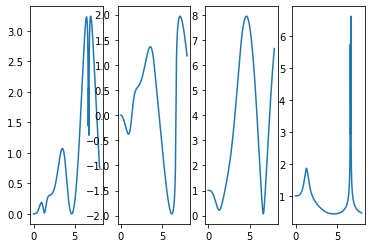

In [51]:
advancer.run()

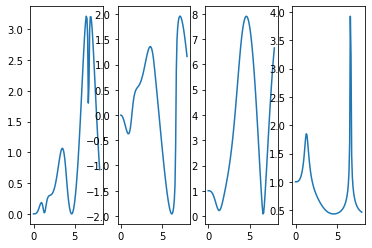

In [52]:
# Monte Carlo
mymc = mc(config)
mymc.run()

# plt.tight_layout()
plt.show()